# Fetch Rewards Take-home Exercise - Machine Learning Engineer

Name: Angel Damian Monroy Mendoza

Email: adamianmm@gmail.com

LinkedIn: https://www.linkedin.com/in/adamian-mm/

### **Context**

At Fetch, they are monitoring the number of scanned receipts in their app on a daily basis as one of our KPIs. From a business standpoint, we sometimes need to predict the possible number of scanned receipts for a given future month.

**Objetive:** Develop an algorithm that can predict the approximate number of scanned receipts for each month of 2022.


**Data**

1) Date: Format DD/MM/YYYY.
2) Receipt_Count: Number of scanned receipts each day for the year 2021.

# Libraries

In [1]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import seaborn as sns 

Import Dataset

In [2]:
tickets = pd.read_csv("data_daily.csv")
tickets

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289
...,...,...
360,2021-12-27,10350408
361,2021-12-28,10219445
362,2021-12-29,10313337
363,2021-12-30,10310644


## Exploratory Data Analysis

### Data Structure

In [3]:
tickets.shape

(365, 2)

In [4]:
tickets.dtypes

# Date           object
Receipt_Count     int64
dtype: object

We have to process the Date column because it had the wrong type of data.

In [5]:
from datetime import datetime
tickets['# Date'] = pd.to_datetime(tickets['# Date'])

In [6]:
tickets.dtypes

# Date           datetime64[ns]
Receipt_Count             int64
dtype: object

In [7]:
tickets

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289
...,...,...
360,2021-12-27,10350408
361,2021-12-28,10219445
362,2021-12-29,10313337
363,2021-12-30,10310644


### Missing Data

In [8]:
tickets.isnull().sum()

# Date           0
Receipt_Count    0
dtype: int64

We don'thave missing values.

### Outliers

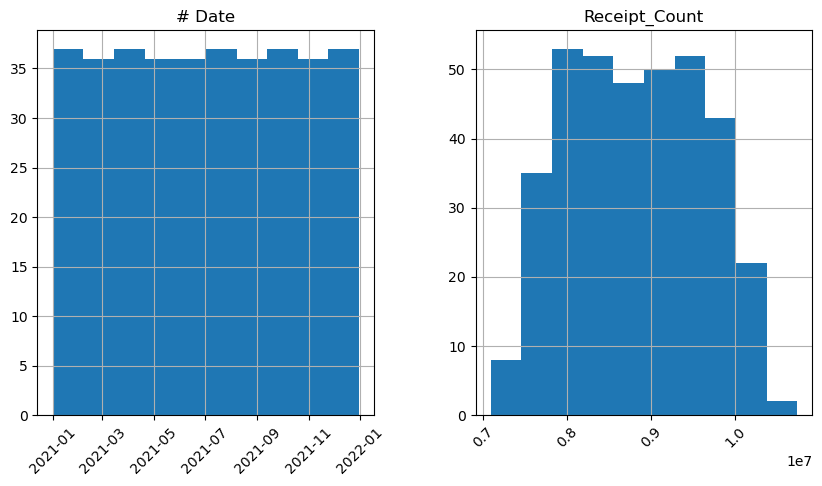

In [9]:
tickets.hist(figsize=(10,5), xrot=45)
plt.show()

Apparently we don't have biased data or outliers.

### Relation between pairs of variables

We only have 1 numeric variable, so it's unnecessary  to do this step.

## Previous Analysis

In [10]:
tickets.describe()

,Receipt_Count
count,3.650000e+02
mean,8.826566e+06
std,7.820089e+05
min,7.095414e+06
25%,8.142874e+06
50%,8.799249e+06
75%,9.476970e+06
max,1.073886e+07


The provided dataset contains 365 data points for the "Receipt_Count" variable. The average (mean) receipt count is approximately 8.83 million, with a standard deviation of approximately 782,008. The minimum count observed is around 7.10 million, while the 25th percentile value is approximately 8.14 million. The median (50th percentile) receipt count is around 8.80 million, and the 75th percentile value is approximately 9.48 million. The highest count recorded is approximately 10.74 million.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


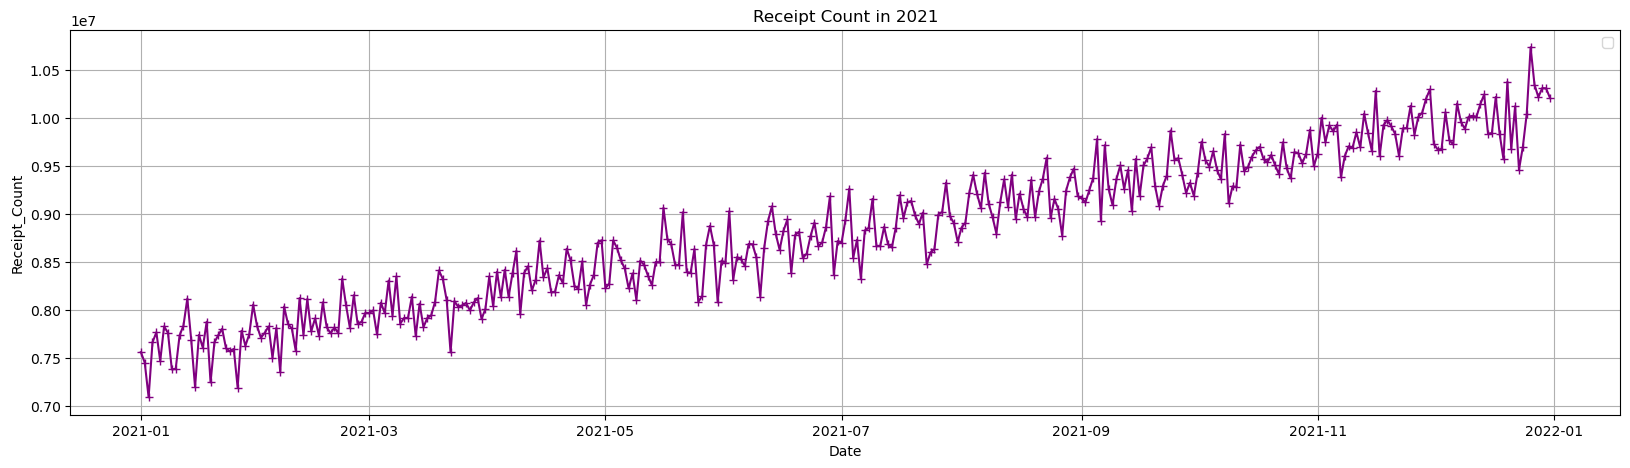

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(tickets['# Date'], tickets['Receipt_Count'], color='purple', marker='+')
plt.xlabel('Date')
plt.ylabel('Receipt_Count')
plt.title('Receipt Count in 2021')
plt.grid(True)
plt.legend()
plt.show()

We have observed an increase in the Receipt Count variable, indicating a higher number of scanned receipts in the app from 2021 to 2022.

In [12]:
tickets.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


## Models
* Linear Regression
* Decision Trees
* Random Forest

We create a variable 'Month' to determine which days belong to each month.

In [13]:
tickets['Month'] = tickets['# Date'].dt.month

In [14]:
tickets

,# Date,Receipt_Count,Month
0,2021-01-01,7564766,1
1,2021-01-02,7455524,1
2,2021-01-03,7095414,1
3,2021-01-04,7666163,1
4,2021-01-05,7771289,1
...,...,...,...
360,2021-12-27,10350408,12
361,2021-12-28,10219445,12
362,2021-12-29,10313337,12
363,2021-12-30,10310644,12


We proposed an additional variable 'Weekend' to determine whether it is important to know if it is a weekend to predict with more effectiveness. I also investigated all the days that were weekends during 2021.

In [15]:
weekend_dates = [
    '2021-01-02', '2021-01-03', '2021-01-09', '2021-01-10', '2021-01-16', '2021-01-17', '2021-01-23', '2021-01-24',
    '2021-01-30', '2021-01-31', '2021-02-06', '2021-02-07', '2021-02-13', '2021-02-14', '2021-02-20', '2021-02-21',
    '2021-02-27', '2021-02-28', '2021-03-06', '2021-03-07', '2021-03-13', '2021-03-14', '2021-03-20', '2021-03-21',
    '2021-03-27', '2021-03-28', '2021-04-03', '2021-04-04', '2021-04-10', '2021-04-11', '2021-04-17', '2021-04-18',
    '2021-04-24', '2021-04-25', '2021-05-01', '2021-05-02', '2021-05-08', '2021-05-09', '2021-05-15', '2021-05-16',
    '2021-05-22', '2021-05-23', '2021-05-29', '2021-05-30', '2021-06-05', '2021-06-06', '2021-06-12', '2021-06-13',
    '2021-06-19', '2021-06-20', '2021-06-26', '2021-06-27', '2021-07-03', '2021-07-04', '2021-07-10', '2021-07-11',
    '2021-07-17', '2021-07-18', '2021-07-24', '2021-07-25', '2021-08-01', '2021-08-07', '2021-08-08', '2021-08-14',
    '2021-08-15', '2021-08-21', '2021-08-22', '2021-08-28', '2021-08-29', '2021-09-04', '2021-09-05', '2021-09-11',
    '2021-09-12', '2021-09-18', '2021-09-19', '2021-09-25', '2021-09-26', '2021-10-02', '2021-10-03', '2021-10-09',
    '2021-10-10', '2021-10-16', '2021-10-17', '2021-10-23', '2021-10-24', '2021-10-30', '2021-10-31', '2021-11-06',
    '2021-11-07', '2021-11-13', '2021-11-14', '2021-11-20', '2021-11-21', '2021-11-27', '2021-11-28', '2021-12-04',
    '2021-12-05', '2021-12-11', '2021-12-12', '2021-12-18', '2021-12-19', '2021-12-25', '2021-12-26'
]
weekend_df = pd.DataFrame({'Date': pd.to_datetime(weekend_dates)})

In [16]:
tickets['Weekend'] = tickets['# Date'].isin(weekend_df['Date'])

In [17]:
tickets['Weekend'] = tickets['Weekend'].astype(int)
tickets

,# Date,Receipt_Count,Month,Weekend
0,2021-01-01,7564766,1,0
1,2021-01-02,7455524,1,1
2,2021-01-03,7095414,1,1
3,2021-01-04,7666163,1,0
4,2021-01-05,7771289,1,0
...,...,...,...,...
360,2021-12-27,10350408,12,0
361,2021-12-28,10219445,12,0
362,2021-12-29,10313337,12,0
363,2021-12-30,10310644,12,0


# Linear Regression

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import model_selection

Create the predictor variables for training the model.

In [19]:
X_train = np.array(tickets[['Month', 'Weekend']])
pd.DataFrame(X_train)

,0,1
0,1,0
1,1,1
2,1,1
3,1,0
4,1,0
...,...,...
360,12,0
361,12,0
362,12,0
363,12,0


Create the target variable that we will predict.

In [20]:
Y_train = np.array(tickets[['Receipt_Count']])
pd.DataFrame(Y_train)

,0
0,7564766
1,7455524
2,7095414
3,7666163
4,7771289
...,...
360,10350408
361,10219445
362,10313337
363,10310644


We fit the model with training predictor and target variables.

In [22]:
LR = linear_model.LinearRegression()
LR.fit(X_train, Y_train)  

LinearRegression()

We save the predictions in a variable named "Y_pronostico" in order to compare with the real data and obtain the evaluation metrics.

In [23]:
Y_pronostico = LR.predict(X_train)
pd.DataFrame(Y_pronostico)

,0
0,7.623226e+06
1,7.638726e+06
2,7.638726e+06
3,7.623226e+06
4,7.623226e+06
...,...
360,1.000986e+07
361,1.000986e+07
362,1.000986e+07
363,1.000986e+07


In [24]:
print('Coefficients: \n', RLMultiple.coef_)
print('Intercept: \n', RLMultiple.intercept_)
print("Residue: %.4f" % mean_absolute_error(Y_train, Y_pronostico))
print("MSE: %.4f" % mean_squared_error(Y_train, Y_pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_train, Y_pronostico, squared=False)) 
print('Score: %.4f' % r2_score(Y_train, Y_pronostico))

Coefficients: 
 [[216967.16994155  15500.1297875 ]]
Intercept: 
 [7406258.34748253]
Residue: 177287.1782
MSE: 50355012023.6522
RMSE: 224399.2247
Score: 0.9174


#### **Formation of the forecast model**

Receipt_Count = 7406258 − 216967(Month) + 15500(Weekend)

* We have a Score of 0.9174, which indicates that we can forecast the Receipt Count depending on the month and whether it is a weekend or not. This prediction will have an effectiveness of 91.74%. In addition, we have an RMSE of almost 225k units of difference.

# Decision Tree

In [37]:
X = np.array(tickets[['Month', 'Weekend']])

In [38]:
Y = np.array(tickets[['Receipt_Count']])

We split the data in Train (80%) and Test (20%).

In [39]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

**Optuna** is an open-source Python library used for hyperparameter optimization. It automates the process of tuning the hyperparameters of machine learning models to find the configuration that leads to the best performance on a given task

In [43]:
from sklearn.tree import DecisionTreeRegressor
import optuna

C:\Users\Principal\anaconda3\lib\site-packages\neptune\common\warnings.py:62: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  warnings.warn(
C:\Users\Principal\anaconda3\lib\site-packages\neptune\common\warnings.py:62: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  warnings.warn(


In [47]:
def objective(trial):
    random_state = trial.suggest_int("random_state", 0, 1000, log=False)
    max_depth = trial.suggest_int("max_depth", 1, 30, log=True)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 100, log=False)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 100, log=False)
    regression_obj = DecisionTreeRegressor(
        random_state=random_state, max_depth=max_depth 
        , min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    regression_obj.fit(X_train, Y_train)
    Y_Prediction = regression_obj.predict(X_test)
    score = r2_score(Y_test,Y_Prediction)
    return score


if __name__ == "__main__":
    study = optuna.create_study(
        direction="maximize"
    )
    study.optimize(objective, n_trials=2000, gc_after_trial=True)
    print(study.best_trial)
    print(f"Best value: {study.best_value} (params: {study.best_params})")
    

[I 2023-10-19 16:53:54,987] A new study created in memory with name: no-name-a5b545e1-c297-4cd6-b414-c0d4b1fecd9d
[I 2023-10-19 16:53:55,009] Trial 0 finished with value: 0.6418340885709497 and parameters: {'random_state': 390, 'max_depth': 1, 'min_samples_leaf': 71, 'min_samples_split': 50}. Best is trial 0 with value: 0.6418340885709497.
[I 2023-10-19 16:53:55,319] Trial 1 finished with value: 0.8616832046556656 and parameters: {'random_state': 909, 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 22}. Best is trial 1 with value: 0.8616832046556656.
[I 2023-10-19 16:53:55,626] Trial 2 finished with value: 0.7546482419339383 and parameters: {'random_state': 488, 'max_depth': 2, 'min_samples_leaf': 76, 'min_samples_split': 59}. Best is trial 1 with value: 0.8616832046556656.
[I 2023-10-19 16:53:55,928] Trial 3 finished with value: 0.6418340885709497 and parameters: {'random_state': 216, 'max_depth': 1, 'min_samples_leaf': 37, 'min_samples_split': 13}. Best is trial 1 with v

[I 2023-10-19 16:54:08,222] Trial 34 finished with value: 0.9117919509275169 and parameters: {'random_state': 427, 'max_depth': 11, 'min_samples_leaf': 22, 'min_samples_split': 9}. Best is trial 16 with value: 0.9117919509275169.
[I 2023-10-19 16:54:08,565] Trial 35 finished with value: 0.6418340885709497 and parameters: {'random_state': 629, 'max_depth': 6, 'min_samples_leaf': 97, 'min_samples_split': 21}. Best is trial 16 with value: 0.9117919509275169.
[I 2023-10-19 16:54:08,905] Trial 36 finished with value: 0.8616832046556656 and parameters: {'random_state': 343, 'max_depth': 9, 'min_samples_leaf': 29, 'min_samples_split': 6}. Best is trial 16 with value: 0.9117919509275169.
[I 2023-10-19 16:54:09,250] Trial 37 finished with value: 0.8616832046556656 and parameters: {'random_state': 516, 'max_depth': 24, 'min_samples_leaf': 40, 'min_samples_split': 62}. Best is trial 16 with value: 0.9117919509275169.
[I 2023-10-19 16:54:09,584] Trial 38 finished with value: 0.9117919509275169 and

[I 2023-10-19 16:54:21,729] Trial 68 finished with value: 0.9117919509275169 and parameters: {'random_state': 632, 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 16}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:22,160] Trial 69 finished with value: 0.9117919509275169 and parameters: {'random_state': 570, 'max_depth': 12, 'min_samples_leaf': 22, 'min_samples_split': 20}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:22,507] Trial 70 finished with value: 0.907743035387077 and parameters: {'random_state': 725, 'max_depth': 19, 'min_samples_leaf': 4, 'min_samples_split': 2}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:22,851] Trial 71 finished with value: 0.9121471505768036 and parameters: {'random_state': 621, 'max_depth': 17, 'min_samples_leaf': 17, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:23,207] Trial 72 finished with value: 0.9012395137931652 an

[I 2023-10-19 16:54:35,036] Trial 102 finished with value: 0.7560305111535902 and parameters: {'random_state': 483, 'max_depth': 9, 'min_samples_leaf': 66, 'min_samples_split': 4}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:35,464] Trial 103 finished with value: 0.9117919509275169 and parameters: {'random_state': 714, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 7}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:35,912] Trial 104 finished with value: 0.9043362535965493 and parameters: {'random_state': 433, 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 30}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:36,348] Trial 105 finished with value: 0.9117919509275169 and parameters: {'random_state': 408, 'max_depth': 14, 'min_samples_leaf': 12, 'min_samples_split': 2}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:36,786] Trial 106 finished with value: 0.9117919509275169 a

[I 2023-10-19 16:54:48,239] Trial 136 finished with value: 0.9117919509275169 and parameters: {'random_state': 670, 'max_depth': 10, 'min_samples_leaf': 17, 'min_samples_split': 13}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:48,663] Trial 137 finished with value: 0.6418340885709497 and parameters: {'random_state': 526, 'max_depth': 16, 'min_samples_leaf': 94, 'min_samples_split': 2}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:49,279] Trial 138 finished with value: 0.9117919509275169 and parameters: {'random_state': 325, 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 9}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:49,729] Trial 139 finished with value: 0.9117919509275169 and parameters: {'random_state': 430, 'max_depth': 15, 'min_samples_leaf': 22, 'min_samples_split': 36}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:54:50,246] Trial 140 finished with value: 0.86168320465566

[I 2023-10-19 16:55:02,713] Trial 170 finished with value: 0.8987267784713386 and parameters: {'random_state': 662, 'max_depth': 9, 'min_samples_leaf': 23, 'min_samples_split': 10}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:03,145] Trial 171 finished with value: 0.9117919509275169 and parameters: {'random_state': 180, 'max_depth': 15, 'min_samples_leaf': 17, 'min_samples_split': 3}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:03,505] Trial 172 finished with value: 0.9117919509275169 and parameters: {'random_state': 161, 'max_depth': 11, 'min_samples_leaf': 13, 'min_samples_split': 5}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:03,920] Trial 173 finished with value: 0.9117919509275169 and parameters: {'random_state': 138, 'max_depth': 14, 'min_samples_leaf': 18, 'min_samples_split': 2}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:04,354] Trial 174 finished with value: 0.911791950927516

[I 2023-10-19 16:55:16,815] Trial 204 finished with value: 0.9117919509275169 and parameters: {'random_state': 200, 'max_depth': 12, 'min_samples_leaf': 11, 'min_samples_split': 9}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:17,215] Trial 205 finished with value: 0.9117919509275169 and parameters: {'random_state': 431, 'max_depth': 11, 'min_samples_leaf': 18, 'min_samples_split': 2}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:17,704] Trial 206 finished with value: 0.9117919509275169 and parameters: {'random_state': 770, 'max_depth': 13, 'min_samples_leaf': 15, 'min_samples_split': 5}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:18,154] Trial 207 finished with value: 0.9117919509275169 and parameters: {'random_state': 614, 'max_depth': 16, 'min_samples_leaf': 13, 'min_samples_split': 7}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:18,640] Trial 208 finished with value: 0.911791950927516

[I 2023-10-19 16:55:32,627] Trial 238 finished with value: 0.9117919509275169 and parameters: {'random_state': 804, 'max_depth': 9, 'min_samples_leaf': 19, 'min_samples_split': 17}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:33,020] Trial 239 finished with value: 0.9117919509275169 and parameters: {'random_state': 741, 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 13}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:33,402] Trial 240 finished with value: 0.9117919509275169 and parameters: {'random_state': 558, 'max_depth': 17, 'min_samples_leaf': 17, 'min_samples_split': 4}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:33,777] Trial 241 finished with value: 0.8987267784713386 and parameters: {'random_state': 590, 'max_depth': 16, 'min_samples_leaf': 25, 'min_samples_split': 11}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:34,167] Trial 242 finished with value: 0.91179195092751

[I 2023-10-19 16:55:47,047] Trial 272 finished with value: 0.9121471505768036 and parameters: {'random_state': 526, 'max_depth': 12, 'min_samples_leaf': 22, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:47,431] Trial 273 finished with value: 0.8987267784713386 and parameters: {'random_state': 542, 'max_depth': 11, 'min_samples_leaf': 24, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:47,808] Trial 274 finished with value: 0.9117919509275169 and parameters: {'random_state': 522, 'max_depth': 12, 'min_samples_leaf': 22, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:48,210] Trial 275 finished with value: 0.8637706161347165 and parameters: {'random_state': 558, 'max_depth': 10, 'min_samples_leaf': 26, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:55:48,589] Trial 276 finished with value: 0.91214715057

[I 2023-10-19 16:56:01,263] Trial 306 finished with value: 0.9078897666594543 and parameters: {'random_state': 498, 'max_depth': 9, 'min_samples_leaf': 19, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:01,631] Trial 307 finished with value: 0.9117919509275169 and parameters: {'random_state': 526, 'max_depth': 10, 'min_samples_leaf': 21, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:02,004] Trial 308 finished with value: 0.8987267784713386 and parameters: {'random_state': 472, 'max_depth': 11, 'min_samples_leaf': 25, 'min_samples_split': 41}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:02,384] Trial 309 finished with value: 0.9078897666594543 and parameters: {'random_state': 512, 'max_depth': 13, 'min_samples_leaf': 19, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:02,755] Trial 310 finished with value: 0.911791950927

[I 2023-10-19 16:56:16,539] Trial 340 finished with value: 0.9117919509275169 and parameters: {'random_state': 504, 'max_depth': 11, 'min_samples_leaf': 22, 'min_samples_split': 38}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:16,946] Trial 341 finished with value: 0.8637706161347165 and parameters: {'random_state': 555, 'max_depth': 13, 'min_samples_leaf': 26, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:17,330] Trial 342 finished with value: 0.9121471505768036 and parameters: {'random_state': 518, 'max_depth': 14, 'min_samples_leaf': 20, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:17,826] Trial 343 finished with value: 0.8987267784713386 and parameters: {'random_state': 518, 'max_depth': 12, 'min_samples_leaf': 24, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:18,317] Trial 344 finished with value: 0.90139850021

[I 2023-10-19 16:56:31,576] Trial 374 finished with value: 0.9078897666594543 and parameters: {'random_state': 516, 'max_depth': 12, 'min_samples_leaf': 19, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:31,952] Trial 375 finished with value: 0.8616832046556656 and parameters: {'random_state': 561, 'max_depth': 14, 'min_samples_leaf': 28, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:32,341] Trial 376 finished with value: 0.9117919509275169 and parameters: {'random_state': 534, 'max_depth': 9, 'min_samples_leaf': 21, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:32,720] Trial 377 finished with value: 0.9117919509275169 and parameters: {'random_state': 486, 'max_depth': 11, 'min_samples_leaf': 16, 'min_samples_split': 38}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:33,172] Trial 378 finished with value: 0.898726778471

[I 2023-10-19 16:56:46,637] Trial 408 finished with value: 0.6418340885709497 and parameters: {'random_state': 486, 'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:47,046] Trial 409 finished with value: 0.841249429968837 and parameters: {'random_state': 447, 'max_depth': 2, 'min_samples_leaf': 48, 'min_samples_split': 40}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:47,449] Trial 410 finished with value: 0.8987267784713386 and parameters: {'random_state': 507, 'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:47,843] Trial 411 finished with value: 0.9013985002150233 and parameters: {'random_state': 561, 'max_depth': 18, 'min_samples_leaf': 22, 'min_samples_split': 55}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:56:48,228] Trial 412 finished with value: 0.90332692527221

[I 2023-10-19 16:57:01,416] Trial 442 finished with value: 0.9078897666594543 and parameters: {'random_state': 586, 'max_depth': 22, 'min_samples_leaf': 22, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:01,895] Trial 443 finished with value: 0.9117919509275169 and parameters: {'random_state': 469, 'max_depth': 14, 'min_samples_leaf': 16, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:02,297] Trial 444 finished with value: 0.9121471505768036 and parameters: {'random_state': 526, 'max_depth': 12, 'min_samples_leaf': 18, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:02,680] Trial 445 finished with value: 0.9117919509275169 and parameters: {'random_state': 624, 'max_depth': 27, 'min_samples_leaf': 22, 'min_samples_split': 41}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:03,069] Trial 446 finished with value: 0.90332692527

[I 2023-10-19 16:57:15,956] Trial 476 finished with value: 0.9117919509275169 and parameters: {'random_state': 638, 'max_depth': 8, 'min_samples_leaf': 22, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:16,463] Trial 477 finished with value: 0.9121471505768036 and parameters: {'random_state': 516, 'max_depth': 11, 'min_samples_leaf': 17, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:16,922] Trial 478 finished with value: 0.8637706161347165 and parameters: {'random_state': 468, 'max_depth': 26, 'min_samples_leaf': 26, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:17,397] Trial 479 finished with value: 0.9117919509275169 and parameters: {'random_state': 538, 'max_depth': 13, 'min_samples_leaf': 20, 'min_samples_split': 37}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:17,875] Trial 480 finished with value: 0.911791950927

[I 2023-10-19 16:57:31,752] Trial 510 finished with value: 0.9078897666594543 and parameters: {'random_state': 455, 'max_depth': 13, 'min_samples_leaf': 13, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:32,454] Trial 511 finished with value: 0.8987267784713386 and parameters: {'random_state': 558, 'max_depth': 11, 'min_samples_leaf': 24, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:33,262] Trial 512 finished with value: 0.9078897666594543 and parameters: {'random_state': 508, 'max_depth': 14, 'min_samples_leaf': 21, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:33,813] Trial 513 finished with value: 0.9117919509275169 and parameters: {'random_state': 591, 'max_depth': 11, 'min_samples_leaf': 18, 'min_samples_split': 41}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:34,302] Trial 514 finished with value: 0.86168320465

[I 2023-10-19 16:57:49,114] Trial 544 finished with value: 0.8616832046556656 and parameters: {'random_state': 531, 'max_depth': 18, 'min_samples_leaf': 27, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:49,626] Trial 545 finished with value: 0.9117919509275169 and parameters: {'random_state': 461, 'max_depth': 15, 'min_samples_leaf': 17, 'min_samples_split': 37}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:50,140] Trial 546 finished with value: 0.8987267784713386 and parameters: {'random_state': 563, 'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:50,556] Trial 547 finished with value: 0.9078897666594543 and parameters: {'random_state': 495, 'max_depth': 13, 'min_samples_leaf': 22, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:57:50,959] Trial 548 finished with value: 0.91214715057

[I 2023-10-19 16:58:04,110] Trial 578 finished with value: 0.9117919509275169 and parameters: {'random_state': 576, 'max_depth': 11, 'min_samples_leaf': 20, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:04,672] Trial 579 finished with value: 0.8987267784713386 and parameters: {'random_state': 512, 'max_depth': 12, 'min_samples_leaf': 25, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:05,292] Trial 580 finished with value: 0.9121471505768036 and parameters: {'random_state': 531, 'max_depth': 8, 'min_samples_leaf': 22, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:05,796] Trial 581 finished with value: 0.9033269252722161 and parameters: {'random_state': 498, 'max_depth': 16, 'min_samples_leaf': 16, 'min_samples_split': 51}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:06,280] Trial 582 finished with value: 0.911791950927

[I 2023-10-19 16:58:19,919] Trial 612 finished with value: 0.8987267784713386 and parameters: {'random_state': 595, 'max_depth': 4, 'min_samples_leaf': 24, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:20,415] Trial 613 finished with value: 0.9117919509275169 and parameters: {'random_state': 735, 'max_depth': 9, 'min_samples_leaf': 14, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:20,892] Trial 614 finished with value: 0.8616832046556656 and parameters: {'random_state': 548, 'max_depth': 12, 'min_samples_leaf': 29, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:21,399] Trial 615 finished with value: 0.8616832046556656 and parameters: {'random_state': 471, 'max_depth': 14, 'min_samples_leaf': 34, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:21,881] Trial 616 finished with value: 0.9078897666594

[I 2023-10-19 16:58:35,072] Trial 646 finished with value: 0.8987267784713386 and parameters: {'random_state': 500, 'max_depth': 11, 'min_samples_leaf': 24, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:35,602] Trial 647 finished with value: 0.9117919509275169 and parameters: {'random_state': 542, 'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 39}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:36,070] Trial 648 finished with value: 0.9117919509275169 and parameters: {'random_state': 581, 'max_depth': 10, 'min_samples_leaf': 21, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:36,609] Trial 649 finished with value: 0.9078897666594543 and parameters: {'random_state': 434, 'max_depth': 20, 'min_samples_leaf': 18, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:37,092] Trial 650 finished with value: 0.89872677847

[I 2023-10-19 16:58:50,470] Trial 680 finished with value: 0.9078897666594543 and parameters: {'random_state': 529, 'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:50,996] Trial 681 finished with value: 0.8987267784713386 and parameters: {'random_state': 497, 'max_depth': 10, 'min_samples_leaf': 24, 'min_samples_split': 38}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:51,504] Trial 682 finished with value: 0.9117919509275169 and parameters: {'random_state': 915, 'max_depth': 13, 'min_samples_leaf': 13, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:52,029] Trial 683 finished with value: 0.9117919509275169 and parameters: {'random_state': 412, 'max_depth': 28, 'min_samples_leaf': 21, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:58:52,600] Trial 684 finished with value: 0.907889766659

[I 2023-10-19 16:59:06,473] Trial 714 finished with value: 0.9078897666594543 and parameters: {'random_state': 562, 'max_depth': 11, 'min_samples_leaf': 14, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:06,987] Trial 715 finished with value: 0.8987267784713386 and parameters: {'random_state': 719, 'max_depth': 18, 'min_samples_leaf': 24, 'min_samples_split': 51}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:07,483] Trial 716 finished with value: 0.9043362535965493 and parameters: {'random_state': 482, 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:08,012] Trial 717 finished with value: 0.9078897666594543 and parameters: {'random_state': 446, 'max_depth': 10, 'min_samples_leaf': 19, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:08,549] Trial 718 finished with value: 0.9117919509275

[I 2023-10-19 16:59:21,998] Trial 748 finished with value: 0.9117919509275169 and parameters: {'random_state': 825, 'max_depth': 24, 'min_samples_leaf': 21, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:22,520] Trial 749 finished with value: 0.9078897666594543 and parameters: {'random_state': 472, 'max_depth': 12, 'min_samples_leaf': 16, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:23,076] Trial 750 finished with value: 0.9121471505768036 and parameters: {'random_state': 503, 'max_depth': 9, 'min_samples_leaf': 19, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:23,591] Trial 751 finished with value: 0.8987267784713386 and parameters: {'random_state': 662, 'max_depth': 8, 'min_samples_leaf': 24, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:24,102] Trial 752 finished with value: 0.9117919509275

[I 2023-10-19 16:59:37,750] Trial 782 finished with value: 0.8987267784713386 and parameters: {'random_state': 419, 'max_depth': 12, 'min_samples_leaf': 25, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:38,278] Trial 783 finished with value: 0.9078897666594543 and parameters: {'random_state': 596, 'max_depth': 5, 'min_samples_leaf': 22, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:38,794] Trial 784 finished with value: 0.9033269252722161 and parameters: {'random_state': 512, 'max_depth': 24, 'min_samples_leaf': 20, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:39,334] Trial 785 finished with value: 0.9117919509275169 and parameters: {'random_state': 479, 'max_depth': 18, 'min_samples_leaf': 12, 'min_samples_split': 41}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:39,866] Trial 786 finished with value: 0.911791950927

[I 2023-10-19 16:59:53,470] Trial 816 finished with value: 0.9043362535965493 and parameters: {'random_state': 511, 'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:54,038] Trial 817 finished with value: 0.9117919509275169 and parameters: {'random_state': 538, 'max_depth': 15, 'min_samples_leaf': 19, 'min_samples_split': 40}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:54,579] Trial 818 finished with value: 0.9078897666594543 and parameters: {'random_state': 672, 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:55,271] Trial 819 finished with value: 0.9117919509275169 and parameters: {'random_state': 503, 'max_depth': 10, 'min_samples_leaf': 21, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 16:59:55,895] Trial 820 finished with value: 0.8987267784713

[I 2023-10-19 17:00:10,698] Trial 850 finished with value: 0.9046914532458361 and parameters: {'random_state': 526, 'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:11,240] Trial 851 finished with value: 0.8966393669922877 and parameters: {'random_state': 593, 'max_depth': 3, 'min_samples_leaf': 23, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:11,789] Trial 852 finished with value: 0.8637706161347165 and parameters: {'random_state': 469, 'max_depth': 28, 'min_samples_leaf': 26, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:12,429] Trial 853 finished with value: 0.9012395137931652 and parameters: {'random_state': 561, 'max_depth': 23, 'min_samples_leaf': 20, 'min_samples_split': 54}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:12,934] Trial 854 finished with value: 0.9117919509275

[I 2023-10-19 17:00:27,454] Trial 884 finished with value: 0.9117919509275169 and parameters: {'random_state': 499, 'max_depth': 12, 'min_samples_leaf': 21, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:27,999] Trial 885 finished with value: 0.9078897666594543 and parameters: {'random_state': 523, 'max_depth': 11, 'min_samples_leaf': 16, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:28,538] Trial 886 finished with value: 0.9078897666594543 and parameters: {'random_state': 547, 'max_depth': 14, 'min_samples_leaf': 19, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:29,078] Trial 887 finished with value: 0.8987267784713386 and parameters: {'random_state': 577, 'max_depth': 20, 'min_samples_leaf': 24, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:29,633] Trial 888 finished with value: 0.91179195092

[I 2023-10-19 17:00:44,499] Trial 918 finished with value: 0.9121471505768036 and parameters: {'random_state': 628, 'max_depth': 9, 'min_samples_leaf': 20, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:45,063] Trial 919 finished with value: 0.9117919509275169 and parameters: {'random_state': 508, 'max_depth': 12, 'min_samples_leaf': 21, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:45,558] Trial 920 finished with value: 0.9033269252722161 and parameters: {'random_state': 541, 'max_depth': 15, 'min_samples_leaf': 19, 'min_samples_split': 52}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:46,152] Trial 921 finished with value: 0.9078897666594543 and parameters: {'random_state': 458, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:00:46,756] Trial 922 finished with value: 0.89872677847133

[I 2023-10-19 17:01:01,770] Trial 952 finished with value: 0.9117919509275169 and parameters: {'random_state': 544, 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:02,243] Trial 953 finished with value: 0.8987267784713386 and parameters: {'random_state': 637, 'max_depth': 10, 'min_samples_leaf': 23, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:02,766] Trial 954 finished with value: 0.9117919509275169 and parameters: {'random_state': 588, 'max_depth': 11, 'min_samples_leaf': 18, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:03,264] Trial 955 finished with value: 0.8616832046556656 and parameters: {'random_state': 513, 'max_depth': 12, 'min_samples_leaf': 28, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:03,700] Trial 956 finished with value: 0.912147150576

[I 2023-10-19 17:01:19,299] Trial 986 finished with value: 0.9117919509275169 and parameters: {'random_state': 561, 'max_depth': 14, 'min_samples_leaf': 22, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:19,849] Trial 987 finished with value: 0.9117919509275169 and parameters: {'random_state': 631, 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:20,397] Trial 988 finished with value: 0.9078897666594543 and parameters: {'random_state': 530, 'max_depth': 25, 'min_samples_leaf': 21, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:21,016] Trial 989 finished with value: 0.8616832046556656 and parameters: {'random_state': 431, 'max_depth': 13, 'min_samples_leaf': 27, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:21,493] Trial 990 finished with value: 0.911791950927

[I 2023-10-19 17:01:36,176] Trial 1020 finished with value: 0.9078897666594543 and parameters: {'random_state': 567, 'max_depth': 6, 'min_samples_leaf': 16, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:36,605] Trial 1021 finished with value: 0.9117919509275169 and parameters: {'random_state': 533, 'max_depth': 30, 'min_samples_leaf': 19, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:37,038] Trial 1022 finished with value: 0.9121471505768036 and parameters: {'random_state': 511, 'max_depth': 19, 'min_samples_leaf': 22, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:37,484] Trial 1023 finished with value: 0.8987267784713386 and parameters: {'random_state': 549, 'max_depth': 12, 'min_samples_leaf': 25, 'min_samples_split': 41}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:38,033] Trial 1024 finished with value: 0.9078897

[I 2023-10-19 17:01:53,333] Trial 1054 finished with value: 0.8987267784713386 and parameters: {'random_state': 611, 'max_depth': 13, 'min_samples_leaf': 25, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:53,783] Trial 1055 finished with value: 0.9117919509275169 and parameters: {'random_state': 548, 'max_depth': 11, 'min_samples_leaf': 22, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:54,227] Trial 1056 finished with value: 0.9121471505768036 and parameters: {'random_state': 521, 'max_depth': 26, 'min_samples_leaf': 15, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:54,666] Trial 1057 finished with value: 0.8616832046556656 and parameters: {'random_state': 588, 'max_depth': 11, 'min_samples_leaf': 45, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:01:55,115] Trial 1058 finished with value: 0.907889

[I 2023-10-19 17:02:12,470] Trial 1088 finished with value: 0.8616832046556656 and parameters: {'random_state': 498, 'max_depth': 19, 'min_samples_leaf': 28, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:13,127] Trial 1089 finished with value: 0.8987267784713386 and parameters: {'random_state': 557, 'max_depth': 6, 'min_samples_leaf': 23, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:13,769] Trial 1090 finished with value: 0.9117919509275169 and parameters: {'random_state': 528, 'max_depth': 16, 'min_samples_leaf': 12, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:14,371] Trial 1091 finished with value: 0.9078897666594543 and parameters: {'random_state': 610, 'max_depth': 27, 'min_samples_leaf': 17, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:14,958] Trial 1092 finished with value: 0.9117919

[I 2023-10-19 17:02:31,263] Trial 1122 finished with value: 0.9117919509275169 and parameters: {'random_state': 595, 'max_depth': 15, 'min_samples_leaf': 21, 'min_samples_split': 35}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:31,801] Trial 1123 finished with value: 0.9117919509275169 and parameters: {'random_state': 563, 'max_depth': 12, 'min_samples_leaf': 17, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:32,403] Trial 1124 finished with value: 0.9078897666594543 and parameters: {'random_state': 521, 'max_depth': 16, 'min_samples_leaf': 22, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:33,135] Trial 1125 finished with value: 0.9033269252722161 and parameters: {'random_state': 494, 'max_depth': 13, 'min_samples_leaf': 14, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:33,752] Trial 1126 finished with value: 0.861683

[I 2023-10-19 17:02:51,349] Trial 1156 finished with value: 0.9117919509275169 and parameters: {'random_state': 527, 'max_depth': 11, 'min_samples_leaf': 21, 'min_samples_split': 41}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:52,053] Trial 1157 finished with value: 0.9078897666594543 and parameters: {'random_state': 468, 'max_depth': 13, 'min_samples_leaf': 6, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:52,733] Trial 1158 finished with value: 0.9117919509275169 and parameters: {'random_state': 567, 'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:53,480] Trial 1159 finished with value: 0.8987267784713386 and parameters: {'random_state': 425, 'max_depth': 8, 'min_samples_leaf': 24, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:02:54,336] Trial 1160 finished with value: 0.90788976

[I 2023-10-19 17:03:11,407] Trial 1190 finished with value: 0.9078897666594543 and parameters: {'random_state': 579, 'max_depth': 13, 'min_samples_leaf': 18, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:03:11,844] Trial 1191 finished with value: 0.9117919509275169 and parameters: {'random_state': 533, 'max_depth': 21, 'min_samples_leaf': 13, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:03:12,298] Trial 1192 finished with value: 0.7560305111535902 and parameters: {'random_state': 478, 'max_depth': 14, 'min_samples_leaf': 67, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:03:12,819] Trial 1193 finished with value: 0.9117919509275169 and parameters: {'random_state': 551, 'max_depth': 11, 'min_samples_leaf': 22, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:03:13,278] Trial 1194 finished with value: 0.907889

[I 2023-10-19 17:03:31,138] Trial 1224 finished with value: 0.6418340885709497 and parameters: {'random_state': 584, 'max_depth': 1, 'min_samples_leaf': 16, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:03:31,585] Trial 1225 finished with value: 0.9117919509275169 and parameters: {'random_state': 1, 'max_depth': 11, 'min_samples_leaf': 22, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:03:32,070] Trial 1226 finished with value: 0.6418340885709497 and parameters: {'random_state': 624, 'max_depth': 25, 'min_samples_leaf': 96, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:03:32,546] Trial 1227 finished with value: 0.9033269252722161 and parameters: {'random_state': 536, 'max_depth': 12, 'min_samples_leaf': 19, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:03:33,066] Trial 1228 finished with value: 0.898726778

[I 2023-10-19 17:03:57,197] Trial 1258 finished with value: 0.9033269252722161 and parameters: {'random_state': 494, 'max_depth': 12, 'min_samples_leaf': 22, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:03:57,958] Trial 1259 finished with value: 0.9117919509275169 and parameters: {'random_state': 815, 'max_depth': 10, 'min_samples_leaf': 19, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:03:59,033] Trial 1260 finished with value: 0.8987267784713386 and parameters: {'random_state': 596, 'max_depth': 11, 'min_samples_leaf': 25, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:03:59,942] Trial 1261 finished with value: 0.9078897666594543 and parameters: {'random_state': 857, 'max_depth': 9, 'min_samples_leaf': 21, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:00,686] Trial 1262 finished with value: 0.9121471

[I 2023-10-19 17:04:16,597] Trial 1292 finished with value: 0.6418340885709497 and parameters: {'random_state': 559, 'max_depth': 18, 'min_samples_leaf': 82, 'min_samples_split': 51}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:17,086] Trial 1293 finished with value: 0.9117919509275169 and parameters: {'random_state': 463, 'max_depth': 11, 'min_samples_leaf': 18, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:17,578] Trial 1294 finished with value: 0.9121471505768036 and parameters: {'random_state': 517, 'max_depth': 14, 'min_samples_leaf': 20, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:18,069] Trial 1295 finished with value: 0.9078897666594543 and parameters: {'random_state': 608, 'max_depth': 27, 'min_samples_leaf': 15, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:18,568] Trial 1296 finished with value: 0.898726

[I 2023-10-19 17:04:35,024] Trial 1326 finished with value: 0.9117919509275169 and parameters: {'random_state': 495, 'max_depth': 12, 'min_samples_leaf': 14, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:35,492] Trial 1327 finished with value: 0.9117919509275169 and parameters: {'random_state': 702, 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 40}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:35,966] Trial 1328 finished with value: 0.9078897666594543 and parameters: {'random_state': 459, 'max_depth': 26, 'min_samples_leaf': 21, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:36,471] Trial 1329 finished with value: 0.8616832046556656 and parameters: {'random_state': 545, 'max_depth': 18, 'min_samples_leaf': 29, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:36,992] Trial 1330 finished with value: 0.911791

[I 2023-10-19 17:04:54,827] Trial 1360 finished with value: 0.9078897666594543 and parameters: {'random_state': 444, 'max_depth': 19, 'min_samples_leaf': 17, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:55,416] Trial 1361 finished with value: 0.9033269252722161 and parameters: {'random_state': 519, 'max_depth': 10, 'min_samples_leaf': 14, 'min_samples_split': 52}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:55,968] Trial 1362 finished with value: 0.9117919509275169 and parameters: {'random_state': 538, 'max_depth': 15, 'min_samples_leaf': 21, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:56,636] Trial 1363 finished with value: 0.8987267784713386 and parameters: {'random_state': 158, 'max_depth': 28, 'min_samples_leaf': 24, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:04:57,282] Trial 1364 finished with value: 0.907889

[I 2023-10-19 17:05:14,860] Trial 1394 finished with value: 0.9033269252722161 and parameters: {'random_state': 514, 'max_depth': 22, 'min_samples_leaf': 19, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:15,499] Trial 1395 finished with value: 0.8987267784713386 and parameters: {'random_state': 598, 'max_depth': 14, 'min_samples_leaf': 24, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:16,136] Trial 1396 finished with value: 0.9117919509275169 and parameters: {'random_state': 569, 'max_depth': 13, 'min_samples_leaf': 17, 'min_samples_split': 38}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:16,714] Trial 1397 finished with value: 0.9117919509275169 and parameters: {'random_state': 482, 'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:17,320] Trial 1398 finished with value: 0.901239

[I 2023-10-19 17:05:35,640] Trial 1428 finished with value: 0.8616832046556656 and parameters: {'random_state': 515, 'max_depth': 12, 'min_samples_leaf': 14, 'min_samples_split': 79}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:36,241] Trial 1429 finished with value: 0.9078897666594543 and parameters: {'random_state': 538, 'max_depth': 10, 'min_samples_leaf': 21, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:36,822] Trial 1430 finished with value: 0.8987267784713386 and parameters: {'random_state': 571, 'max_depth': 7, 'min_samples_leaf': 24, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:37,318] Trial 1431 finished with value: 0.9117919509275169 and parameters: {'random_state': 946, 'max_depth': 17, 'min_samples_leaf': 16, 'min_samples_split': 36}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:37,786] Trial 1432 finished with value: 0.9117919

[I 2023-10-19 17:05:54,491] Trial 1462 finished with value: 0.8637706161347165 and parameters: {'random_state': 500, 'max_depth': 11, 'min_samples_leaf': 26, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:54,998] Trial 1463 finished with value: 0.9078897666594543 and parameters: {'random_state': 473, 'max_depth': 16, 'min_samples_leaf': 19, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:55,494] Trial 1464 finished with value: 0.9033269252722161 and parameters: {'random_state': 528, 'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 53}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:56,017] Trial 1465 finished with value: 0.9078897666594543 and parameters: {'random_state': 508, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:05:56,511] Trial 1466 finished with value: 0.75603051

[I 2023-10-19 17:06:12,845] Trial 1496 finished with value: 0.9117919509275169 and parameters: {'random_state': 557, 'max_depth': 14, 'min_samples_leaf': 16, 'min_samples_split': 40}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:13,319] Trial 1497 finished with value: 0.9078897666594543 and parameters: {'random_state': 616, 'max_depth': 16, 'min_samples_leaf': 22, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:13,792] Trial 1498 finished with value: 0.9078897666594543 and parameters: {'random_state': 497, 'max_depth': 4, 'min_samples_leaf': 19, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:14,270] Trial 1499 finished with value: 0.8966393669922877 and parameters: {'random_state': 435, 'max_depth': 3, 'min_samples_leaf': 25, 'min_samples_split': 52}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:14,744] Trial 1500 finished with value: 0.91179195

[I 2023-10-19 17:06:31,176] Trial 1530 finished with value: 0.9078897666594543 and parameters: {'random_state': 541, 'max_depth': 7, 'min_samples_leaf': 22, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:31,660] Trial 1531 finished with value: 0.8637706161347165 and parameters: {'random_state': 524, 'max_depth': 6, 'min_samples_leaf': 26, 'min_samples_split': 41}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:32,288] Trial 1532 finished with value: 0.9117919509275169 and parameters: {'random_state': 496, 'max_depth': 14, 'min_samples_leaf': 15, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:32,894] Trial 1533 finished with value: 0.9078897666594543 and parameters: {'random_state': 554, 'max_depth': 12, 'min_samples_leaf': 20, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:33,506] Trial 1534 finished with value: 0.90332692

[I 2023-10-19 17:06:49,444] Trial 1564 finished with value: 0.9078897666594543 and parameters: {'random_state': 513, 'max_depth': 15, 'min_samples_leaf': 18, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:50,058] Trial 1565 finished with value: 0.9117919509275169 and parameters: {'random_state': 547, 'max_depth': 11, 'min_samples_leaf': 21, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:50,716] Trial 1566 finished with value: 0.8987267784713386 and parameters: {'random_state': 571, 'max_depth': 12, 'min_samples_leaf': 23, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:51,327] Trial 1567 finished with value: 0.9012395137931652 and parameters: {'random_state': 526, 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:06:51,930] Trial 1568 finished with value: 0.9117919

[I 2023-10-19 17:07:08,430] Trial 1598 finished with value: 0.9117919509275169 and parameters: {'random_state': 564, 'max_depth': 13, 'min_samples_leaf': 18, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:09,012] Trial 1599 finished with value: 0.8987267784713386 and parameters: {'random_state': 412, 'max_depth': 11, 'min_samples_leaf': 23, 'min_samples_split': 46}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:09,602] Trial 1600 finished with value: 0.9117919509275169 and parameters: {'random_state': 530, 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:10,182] Trial 1601 finished with value: 0.9117919509275169 and parameters: {'random_state': 480, 'max_depth': 14, 'min_samples_leaf': 21, 'min_samples_split': 40}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:10,672] Trial 1602 finished with value: 0.898726

[I 2023-10-19 17:07:27,803] Trial 1632 finished with value: 0.9078897666594543 and parameters: {'random_state': 887, 'max_depth': 15, 'min_samples_leaf': 12, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:28,302] Trial 1633 finished with value: 0.9117919509275169 and parameters: {'random_state': 577, 'max_depth': 24, 'min_samples_leaf': 20, 'min_samples_split': 41}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:28,839] Trial 1634 finished with value: 0.8987267784713386 and parameters: {'random_state': 632, 'max_depth': 11, 'min_samples_leaf': 23, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:29,370] Trial 1635 finished with value: 0.8637706161347165 and parameters: {'random_state': 536, 'max_depth': 13, 'min_samples_leaf': 26, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:29,855] Trial 1636 finished with value: 0.911791

[I 2023-10-19 17:07:47,170] Trial 1666 finished with value: 0.9078897666594543 and parameters: {'random_state': 461, 'max_depth': 12, 'min_samples_leaf': 21, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:47,679] Trial 1667 finished with value: 0.9117919509275169 and parameters: {'random_state': 512, 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:48,197] Trial 1668 finished with value: 0.8616832046556656 and parameters: {'random_state': 535, 'max_depth': 9, 'min_samples_leaf': 29, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:48,709] Trial 1669 finished with value: 0.9121471505768036 and parameters: {'random_state': 583, 'max_depth': 13, 'min_samples_leaf': 22, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:07:49,218] Trial 1670 finished with value: 0.91179195

[I 2023-10-19 17:08:05,987] Trial 1700 finished with value: 0.9117919509275169 and parameters: {'random_state': 421, 'max_depth': 8, 'min_samples_leaf': 21, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:06,518] Trial 1701 finished with value: 0.8987267784713386 and parameters: {'random_state': 482, 'max_depth': 11, 'min_samples_leaf': 24, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:07,012] Trial 1702 finished with value: 0.9033269252722161 and parameters: {'random_state': 549, 'max_depth': 16, 'min_samples_leaf': 18, 'min_samples_split': 51}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:07,515] Trial 1703 finished with value: 0.9117919509275169 and parameters: {'random_state': 527, 'max_depth': 10, 'min_samples_leaf': 14, 'min_samples_split': 39}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:08,085] Trial 1704 finished with value: 0.9117919

[I 2023-10-19 17:08:30,378] Trial 1734 finished with value: 0.9117919509275169 and parameters: {'random_state': 568, 'max_depth': 18, 'min_samples_leaf': 15, 'min_samples_split': 40}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:30,973] Trial 1735 finished with value: 0.8987267784713386 and parameters: {'random_state': 524, 'max_depth': 10, 'min_samples_leaf': 24, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:31,582] Trial 1736 finished with value: 0.9117919509275169 and parameters: {'random_state': 671, 'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:32,172] Trial 1737 finished with value: 0.9078897666594543 and parameters: {'random_state': 550, 'max_depth': 11, 'min_samples_leaf': 21, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:32,746] Trial 1738 finished with value: 0.8987267

[I 2023-10-19 17:08:51,370] Trial 1768 finished with value: 0.9117919509275169 and parameters: {'random_state': 515, 'max_depth': 13, 'min_samples_leaf': 19, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:51,878] Trial 1769 finished with value: 0.8987267784713386 and parameters: {'random_state': 455, 'max_depth': 10, 'min_samples_leaf': 23, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:52,491] Trial 1770 finished with value: 0.9078897666594543 and parameters: {'random_state': 495, 'max_depth': 11, 'min_samples_leaf': 21, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:53,035] Trial 1771 finished with value: 0.9121471505768036 and parameters: {'random_state': 554, 'max_depth': 12, 'min_samples_leaf': 16, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:08:53,617] Trial 1772 finished with value: 0.898726

[I 2023-10-19 17:09:11,325] Trial 1802 finished with value: 0.8637706161347165 and parameters: {'random_state': 514, 'max_depth': 13, 'min_samples_leaf': 26, 'min_samples_split': 39}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:11,912] Trial 1803 finished with value: 0.9078897666594543 and parameters: {'random_state': 73, 'max_depth': 11, 'min_samples_leaf': 17, 'min_samples_split': 48}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:12,588] Trial 1804 finished with value: 0.8616832046556656 and parameters: {'random_state': 540, 'max_depth': 15, 'min_samples_leaf': 29, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:13,342] Trial 1805 finished with value: 0.9117919509275169 and parameters: {'random_state': 478, 'max_depth': 11, 'min_samples_leaf': 20, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:14,008] Trial 1806 finished with value: 0.9078897

[I 2023-10-19 17:09:33,327] Trial 1836 finished with value: 0.9117919509275169 and parameters: {'random_state': 23, 'max_depth': 9, 'min_samples_leaf': 22, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:34,308] Trial 1837 finished with value: 0.8987267784713386 and parameters: {'random_state': 483, 'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:35,023] Trial 1838 finished with value: 0.9117919509275169 and parameters: {'random_state': 530, 'max_depth': 5, 'min_samples_leaf': 19, 'min_samples_split': 40}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:35,572] Trial 1839 finished with value: 0.9046914532458361 and parameters: {'random_state': 507, 'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:36,089] Trial 1840 finished with value: 0.9012395137

[I 2023-10-19 17:09:55,758] Trial 1870 finished with value: 0.9033269252722161 and parameters: {'random_state': 491, 'max_depth': 23, 'min_samples_leaf': 19, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:56,336] Trial 1871 finished with value: 0.9117919509275169 and parameters: {'random_state': 450, 'max_depth': 13, 'min_samples_leaf': 15, 'min_samples_split': 40}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:56,913] Trial 1872 finished with value: 0.9078897666594543 and parameters: {'random_state': 510, 'max_depth': 16, 'min_samples_leaf': 22, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:57,496] Trial 1873 finished with value: 0.9117919509275169 and parameters: {'random_state': 547, 'max_depth': 14, 'min_samples_leaf': 18, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:09:58,107] Trial 1874 finished with value: 0.912147

[I 2023-10-19 17:10:17,667] Trial 1904 finished with value: 0.9121471505768036 and parameters: {'random_state': 653, 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:10:18,377] Trial 1905 finished with value: 0.9033269252722161 and parameters: {'random_state': 869, 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 50}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:10:19,095] Trial 1906 finished with value: 0.9117919509275169 and parameters: {'random_state': 529, 'max_depth': 24, 'min_samples_leaf': 18, 'min_samples_split': 43}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:10:19,807] Trial 1907 finished with value: 0.9117919509275169 and parameters: {'random_state': 458, 'max_depth': 9, 'min_samples_leaf': 22, 'min_samples_split': 36}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:10:20,605] Trial 1908 finished with value: 0.90788976

[I 2023-10-19 17:10:41,115] Trial 1938 finished with value: 0.8616832046556656 and parameters: {'random_state': 549, 'max_depth': 7, 'min_samples_leaf': 27, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:10:41,731] Trial 1939 finished with value: 0.9117919509275169 and parameters: {'random_state': 514, 'max_depth': 17, 'min_samples_leaf': 19, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:10:42,381] Trial 1940 finished with value: 0.8987267784713386 and parameters: {'random_state': 570, 'max_depth': 8, 'min_samples_leaf': 23, 'min_samples_split': 38}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:10:43,026] Trial 1941 finished with value: 0.9078897666594543 and parameters: {'random_state': 493, 'max_depth': 25, 'min_samples_leaf': 17, 'min_samples_split': 49}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:10:43,668] Trial 1942 finished with value: 0.89872677

[I 2023-10-19 17:11:03,403] Trial 1972 finished with value: 0.8616832046556656 and parameters: {'random_state': 505, 'max_depth': 11, 'min_samples_leaf': 27, 'min_samples_split': 45}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:11:04,004] Trial 1973 finished with value: 0.9078897666594543 and parameters: {'random_state': 588, 'max_depth': 17, 'min_samples_leaf': 17, 'min_samples_split': 47}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:11:04,656] Trial 1974 finished with value: 0.6418340885709497 and parameters: {'random_state': 892, 'max_depth': 1, 'min_samples_leaf': 86, 'min_samples_split': 44}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:11:05,391] Trial 1975 finished with value: 0.9012395137931652 and parameters: {'random_state': 938, 'max_depth': 3, 'min_samples_leaf': 21, 'min_samples_split': 42}. Best is trial 57 with value: 0.9121471505768036.
[I 2023-10-19 17:11:06,023] Trial 1976 finished with value: 0.90788976

FrozenTrial(number=57, state=TrialState.COMPLETE, values=[0.9121471505768036], datetime_start=datetime.datetime(2023, 10, 19, 16, 54, 16, 833625), datetime_complete=datetime.datetime(2023, 10, 19, 16, 54, 16, 895586), params={'random_state': 751, 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 45}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'random_state': IntDistribution(high=1000, log=False, low=0, step=1), 'max_depth': IntDistribution(high=30, log=True, low=1, step=1), 'min_samples_leaf': IntDistribution(high=100, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=100, log=False, low=2, step=1)}, trial_id=57, value=None)
Best value: 0.9121471505768036 (params: {'random_state': 751, 'max_depth': 21, 'min_samples_leaf': 12, 'min_samples_split': 45})


We fit the model with the best parameters that Optuna found.

In [52]:
regression_obj = DecisionTreeRegressor(random_state=751, max_depth=21, min_samples_leaf=12, min_samples_split=45)
regression_obj.fit(X_train, Y_train)
Y_Prediction = regression_obj.predict(X_test)

We print the evaluation metrics

In [54]:
print('Criterio: \n', regression_obj.criterion)
print('Importancia variables: \n', regression_obj.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Prediction))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Prediction))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Prediction, squared=False))
print('Score: %.4f' % r2_score(Y_test, Y_Prediction))

Criterio: 
 squared_error
Importancia variables: 
 [1. 0.]
MAE: 161215.3208
MSE: 41978766427.0412
RMSE: 204887.2042
Score: 0.9121


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

We find the best parameters with Optuna

In [56]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 1, 300, log=True)
    random_state = trial.suggest_int("random_state", 0, 1000, log=False)
    max_depth = trial.suggest_int("max_depth", 1, 30, log=True)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 100, log=False)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 100, log=False)
    regression_obj_BA = RandomForestRegressor(
        random_state=random_state, n_estimators=n_estimators, max_depth=max_depth 
        , min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    regression_obj_BA.fit(X_train, Y_train)
    Y_Prediction_BA = regression_obj_BA.predict(X_test)
    score = r2_score(Y_test,Y_Prediction)
    return score



if __name__ == "__main__":
    study = optuna.create_study(
        direction="maximize"
    )
    study.optimize(objective, n_trials=2000, gc_after_trial=True)
    print(study.best_trial)
    print(f"Best value: {study.best_value} (params: {study.best_params})")
    

[I 2023-10-19 17:29:09,713] A new study created in memory with name: no-name-e9d73b8a-c869-4044-9e08-f8aca63b54f5
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:09,762] Trial 0 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 10, 'random_state': 233, 'max_depth': 2, 'min_samples_leaf': 32, 'min_samples_split': 82}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:10,112] Trial 1 finished with value: 0.9121471505768036 and parameters: {'n_esti

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:18,009] Trial 16 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 17, 'random_state': 991, 'max_depth': 1, 'min_samples_leaf': 33, 'min_samples_split': 40}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:18,498] Trial 17 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 17, 'random_state': 191, 'max_depth': 3, 'min_samples_leaf': 16, 'min_samples_split': 4}. Best is trial

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:24,438] Trial 32 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 8, 'random_state': 840, 'max_depth': 22, 'min_samples_leaf': 24, 'min_samples_split': 70}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:24,825] Trial 33 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 26, 'random_state': 969, 'max_depth': 13, 'min_samples_leaf': 17, 'min_samples_split': 95}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:31,679] Trial 48 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 8, 'random_state': 265, 'max_depth': 13, 'min_samples_leaf': 69, 'min_samples_split': 37}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:32,451] Trial 49 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 102, 'random_state': 26, 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 5}. Best is trial

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:39,104] Trial 64 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 9, 'random_state': 888, 'max_depth': 4, 'min_samples_leaf': 31, 'min_samples_split': 80}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:39,481] Trial 65 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 7, 'random_state': 337, 'max_depth': 15, 'min_samples_leaf': 16, 'min_samples_split': 47}. Best is trial

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:46,300] Trial 80 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 17, 'random_state': 168, 'max_depth': 21, 'min_samples_leaf': 51, 'min_samples_split': 66}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:46,769] Trial 81 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 1, 'random_state': 97, 'max_depth': 2, 'min_samples_leaf': 45, 'min_samples_split': 50}. Best is trial

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:54,233] Trial 96 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 7, 'random_state': 167, 'max_depth': 17, 'min_samples_leaf': 31, 'min_samples_split': 17}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:29:54,688] Trial 97 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 34, 'random_state': 200, 'max_depth': 8, 'min_samples_leaf': 26, 'min_samples_split': 72}. Best is tria

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:01,899] Trial 112 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 44, 'random_state': 83, 'max_depth': 26, 'min_samples_leaf': 29, 'min_samples_split': 95}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:02,770] Trial 113 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 76, 'random_state': 344, 'max_depth': 24, 'min_samples_leaf': 6, 'min_samples_split': 32}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:11,187] Trial 128 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 29, 'random_state': 57, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 28}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:11,693] Trial 129 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 70, 'random_state': 156, 'max_depth': 17, 'min_samples_leaf': 47, 'min_samples_split': 93}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:20,315] Trial 144 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 91, 'random_state': 744, 'max_depth': 11, 'min_samples_leaf': 24, 'min_samples_split': 42}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:20,892] Trial 145 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 4, 'random_state': 226, 'max_depth': 5, 'min_samples_leaf': 87, 'min_samples_split': 81}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:28,665] Trial 160 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 47, 'random_state': 108, 'max_depth': 12, 'min_samples_leaf': 32, 'min_samples_split': 85}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:29,118] Trial 161 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 25, 'random_state': 937, 'max_depth': 1, 'min_samples_leaf': 36, 'min_samples_split': 46}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:37,922] Trial 176 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 12, 'random_state': 0, 'max_depth': 14, 'min_samples_leaf': 30, 'min_samples_split': 29}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:38,516] Trial 177 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 17, 'random_state': 37, 'max_depth': 13, 'min_samples_leaf': 18, 'min_samples_split': 65}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:47,014] Trial 192 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 6, 'random_state': 211, 'max_depth': 18, 'min_samples_leaf': 51, 'min_samples_split': 80}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:47,546] Trial 193 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 9, 'random_state': 169, 'max_depth': 16, 'min_samples_leaf': 35, 'min_samples_split': 90}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:57,962] Trial 208 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 129, 'random_state': 503, 'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 79}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:30:58,564] Trial 209 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 33, 'random_state': 464, 'max_depth': 9, 'min_samples_leaf': 65, 'min_samples_split': 72}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:10,201] Trial 224 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 12, 'random_state': 62, 'max_depth': 27, 'min_samples_leaf': 6, 'min_samples_split': 6}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:10,732] Trial 225 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 2, 'random_state': 730, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}. Best is trial 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:19,948] Trial 240 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 14, 'random_state': 783, 'max_depth': 28, 'min_samples_leaf': 32, 'min_samples_split': 16}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:20,581] Trial 241 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 38, 'random_state': 298, 'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 9}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:30,303] Trial 256 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 49, 'max_depth': 21, 'min_samples_leaf': 63, 'min_samples_split': 92}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:31,079] Trial 257 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 193, 'random_state': 290, 'max_depth': 28, 'min_samples_leaf': 16, 'min_samples_split': 77}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:40,077] Trial 272 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 4, 'random_state': 238, 'max_depth': 3, 'min_samples_leaf': 84, 'min_samples_split': 30}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:40,575] Trial 273 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 7, 'random_state': 515, 'max_depth': 1, 'min_samples_leaf': 34, 'min_samples_split': 37}. Best is tria

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:48,577] Trial 288 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 8, 'random_state': 879, 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 3}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:48,986] Trial 289 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 1, 'random_state': 790, 'max_depth': 4, 'min_samples_leaf': 18, 'min_samples_split': 23}. Best is trial 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:58,091] Trial 304 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 10, 'random_state': 467, 'max_depth': 14, 'min_samples_leaf': 90, 'min_samples_split': 94}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:31:58,521] Trial 305 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 567, 'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 75}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:05,613] Trial 320 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 23, 'random_state': 225, 'max_depth': 5, 'min_samples_leaf': 38, 'min_samples_split': 54}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:06,036] Trial 321 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 8, 'random_state': 52, 'max_depth': 25, 'min_samples_leaf': 43, 'min_samples_split': 89}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:15,595] Trial 336 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 227, 'random_state': 146, 'max_depth': 5, 'min_samples_leaf': 11, 'min_samples_split': 82}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:16,362] Trial 337 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 186, 'random_state': 974, 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 46}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:24,425] Trial 352 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 266, 'random_state': 169, 'max_depth': 24, 'min_samples_leaf': 76, 'min_samples_split': 68}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:24,922] Trial 353 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 1, 'random_state': 88, 'max_depth': 13, 'min_samples_leaf': 29, 'min_samples_split': 52}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:33,344] Trial 368 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 24, 'random_state': 155, 'max_depth': 30, 'min_samples_leaf': 31, 'min_samples_split': 11}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:34,171] Trial 369 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 213, 'random_state': 276, 'max_depth': 10, 'min_samples_leaf': 69, 'min_samples_split': 21}. Best is

[I 2023-10-19 17:32:41,445] Trial 383 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 107, 'random_state': 721, 'max_depth': 25, 'min_samples_leaf': 16, 'min_samples_split': 9}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:42,378] Trial 384 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 157, 'random_state': 412, 'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 62}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:50,044] Trial 399 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 9, 'random_state': 156, 'max_depth': 3, 'min_samples_leaf': 58, 'min_samples_split': 16}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:50,932] Trial 400 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 254, 'random_state': 184, 'max_depth': 16, 'min_samples_leaf': 20, 'min_samples_split': 7}. Best is tr

[I 2023-10-19 17:32:58,920] Trial 414 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 147, 'random_state': 844, 'max_depth': 12, 'min_samples_leaf': 9, 'min_samples_split': 83}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:32:59,539] Trial 415 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 36, 'random_state': 59, 'max_depth': 28, 'min_samples_leaf': 6, 'min_samples_split': 100}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:08,013] Trial 430 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 9, 'random_state': 326, 'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 75}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:08,581] Trial 431 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 84, 'random_state': 271, 'max_depth': 9, 'min_samples_leaf': 81, 'min_samples_split': 21}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:18,572] Trial 446 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 346, 'max_depth': 17, 'min_samples_leaf': 96, 'min_samples_split': 33}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:19,474] Trial 447 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 98, 'random_state': 586, 'max_depth': 30, 'min_samples_leaf': 15, 'min_samples_split': 27}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:28,988] Trial 462 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 30, 'random_state': 47, 'max_depth': 7, 'min_samples_leaf': 68, 'min_samples_split': 2}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:29,721] Trial 463 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 81, 'random_state': 561, 'max_depth': 2, 'min_samples_leaf': 62, 'min_samples_split': 82}. Best is tria

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:37,901] Trial 478 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 24, 'random_state': 162, 'max_depth': 9, 'min_samples_leaf': 13, 'min_samples_split': 94}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:38,367] Trial 479 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 30, 'random_state': 37, 'max_depth': 9, 'min_samples_leaf': 16, 'min_samples_split': 17}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:48,064] Trial 494 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 3, 'random_state': 85, 'max_depth': 27, 'min_samples_leaf': 77, 'min_samples_split': 88}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:48,664] Trial 495 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 4, 'random_state': 307, 'max_depth': 25, 'min_samples_leaf': 26, 'min_samples_split': 78}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:56,754] Trial 510 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 244, 'random_state': 934, 'max_depth': 6, 'min_samples_leaf': 98, 'min_samples_split': 15}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:33:57,192] Trial 511 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 8, 'random_state': 62, 'max_depth': 16, 'min_samples_leaf': 61, 'min_samples_split': 85}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:06,197] Trial 526 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 20, 'random_state': 94, 'max_depth': 17, 'min_samples_leaf': 13, 'min_samples_split': 93}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:06,672] Trial 527 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 22, 'random_state': 166, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 64}. Best is tri

[I 2023-10-19 17:34:14,047] Trial 541 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 118, 'random_state': 457, 'max_depth': 11, 'min_samples_leaf': 36, 'min_samples_split': 3}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:14,547] Trial 542 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 39, 'random_state': 193, 'max_depth': 3, 'min_samples_leaf': 31, 'min_samples_split': 25}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:23,263] Trial 557 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 32, 'random_state': 38, 'max_depth': 23, 'min_samples_leaf': 4, 'min_samples_split': 6}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:23,756] Trial 558 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 44, 'random_state': 225, 'max_depth': 10, 'min_samples_leaf': 68, 'min_samples_split': 27}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:31,861] Trial 573 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 38, 'random_state': 69, 'max_depth': 4, 'min_samples_leaf': 21, 'min_samples_split': 77}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:32,596] Trial 574 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 71, 'random_state': 439, 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 70}. Best is tria

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:41,369] Trial 589 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 29, 'random_state': 162, 'max_depth': 11, 'min_samples_leaf': 87, 'min_samples_split': 96}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:41,792] Trial 590 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 3, 'random_state': 72, 'max_depth': 19, 'min_samples_leaf': 35, 'min_samples_split': 90}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:50,917] Trial 605 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 167, 'random_state': 263, 'max_depth': 1, 'min_samples_leaf': 6, 'min_samples_split': 44}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:51,526] Trial 606 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 29, 'random_state': 205, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 23}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:34:59,480] Trial 621 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 4, 'random_state': 761, 'max_depth': 25, 'min_samples_leaf': 9, 'min_samples_split': 100}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:35:00,049] Trial 622 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 75, 'random_state': 85, 'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 78}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:35:09,753] Trial 637 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 4, 'random_state': 32, 'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split': 42}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:35:10,322] Trial 638 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 9, 'random_state': 653, 'max_depth': 3, 'min_samples_leaf': 16, 'min_samples_split': 25}. Best is trial

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:35:18,611] Trial 653 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 114, 'random_state': 13, 'max_depth': 11, 'min_samples_leaf': 36, 'min_samples_split': 7}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:35:19,113] Trial 654 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 40, 'random_state': 79, 'max_depth': 10, 'min_samples_leaf': 83, 'min_samples_split': 95}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:35:34,524] Trial 669 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 88, 'random_state': 1000, 'max_depth': 7, 'min_samples_leaf': 45, 'min_samples_split': 79}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:35:35,355] Trial 670 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 29, 'random_state': 1, 'max_depth': 2, 'min_samples_leaf': 17, 'min_samples_split': 4}. Best is tria

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:35:47,445] Trial 685 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 10, 'random_state': 365, 'max_depth': 28, 'min_samples_leaf': 15, 'min_samples_split': 29}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:35:47,953] Trial 686 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 40, 'random_state': 334, 'max_depth': 24, 'min_samples_leaf': 4, 'min_samples_split': 15}. Best is t

[I 2023-10-19 17:36:00,587] Trial 700 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 89, 'random_state': 639, 'max_depth': 6, 'min_samples_leaf': 26, 'min_samples_split': 13}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:36:01,743] Trial 701 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 64, 'random_state': 54, 'max_depth': 14, 'min_samples_leaf': 10, 'min_samples_split': 4}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:36:19,337] Trial 716 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 41, 'random_state': 429, 'max_depth': 12, 'min_samples_leaf': 34, 'min_samples_split': 6}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:36:20,060] Trial 717 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 20, 'random_state': 728, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 44}. Best is tri

[I 2023-10-19 17:36:31,445] Trial 731 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 82, 'random_state': 807, 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 23}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:36:32,071] Trial 732 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 1, 'random_state': 861, 'max_depth': 13, 'min_samples_leaf': 13, 'min_samples_split': 12}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:36:41,766] Trial 747 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 300, 'random_state': 33, 'max_depth': 1, 'min_samples_leaf': 22, 'min_samples_split': 35}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:36:42,500] Trial 748 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 71, 'random_state': 70, 'max_depth': 17, 'min_samples_leaf': 100, 'min_samples_split': 64}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:36:51,524] Trial 763 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 49, 'max_depth': 2, 'min_samples_leaf': 43, 'min_samples_split': 28}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:36:52,305] Trial 764 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 88, 'random_state': 200, 'max_depth': 12, 'min_samples_leaf': 29, 'min_samples_split': 7}. Best is tria

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:01,942] Trial 779 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 22, 'random_state': 673, 'max_depth': 11, 'min_samples_leaf': 17, 'min_samples_split': 10}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:02,443] Trial 780 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 2, 'random_state': 108, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 14}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:10,784] Trial 795 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 49, 'random_state': 467, 'max_depth': 1, 'min_samples_leaf': 38, 'min_samples_split': 18}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:11,498] Trial 796 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 145, 'random_state': 232, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 62}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:20,631] Trial 811 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 999, 'max_depth': 6, 'min_samples_leaf': 49, 'min_samples_split': 57}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:21,408] Trial 812 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 174, 'random_state': 709, 'max_depth': 5, 'min_samples_leaf': 43, 'min_samples_split': 4}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:29,938] Trial 827 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 7, 'random_state': 43, 'max_depth': 18, 'min_samples_leaf': 19, 'min_samples_split': 44}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:30,492] Trial 828 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 1, 'random_state': 206, 'max_depth': 14, 'min_samples_leaf': 23, 'min_samples_split': 10}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:39,269] Trial 843 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 844, 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 32}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:39,866] Trial 844 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 78, 'random_state': 146, 'max_depth': 2, 'min_samples_leaf': 76, 'min_samples_split': 28}. Best is tria

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:50,204] Trial 859 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 4, 'random_state': 35, 'max_depth': 10, 'min_samples_leaf': 29, 'min_samples_split': 10}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:50,681] Trial 860 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 9, 'random_state': 393, 'max_depth': 6, 'min_samples_leaf': 57, 'min_samples_split': 29}. Best is tria

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:58,740] Trial 875 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 16, 'random_state': 119, 'max_depth': 16, 'min_samples_leaf': 26, 'min_samples_split': 13}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:37:59,215] Trial 876 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 13, 'random_state': 89, 'max_depth': 25, 'min_samples_leaf': 50, 'min_samples_split': 58}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:38:08,979] Trial 891 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 18, 'random_state': 800, 'max_depth': 4, 'min_samples_leaf': 65, 'min_samples_split': 56}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:38:09,512] Trial 892 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 2, 'random_state': 296, 'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split': 6}. Best is tria

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:38:19,411] Trial 907 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 144, 'random_state': 151, 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 20}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:38:20,069] Trial 908 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 20, 'random_state': 911, 'max_depth': 3, 'min_samples_leaf': 52, 'min_samples_split': 17}. Best is tr

[I 2023-10-19 17:38:28,604] Trial 922 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 246, 'random_state': 589, 'max_depth': 13, 'min_samples_leaf': 6, 'min_samples_split': 13}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:38:29,210] Trial 923 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 82, 'random_state': 124, 'max_depth': 9, 'min_samples_leaf': 15, 'min_samples_split': 25}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:38:39,368] Trial 938 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 13, 'random_state': 1, 'max_depth': 12, 'min_samples_leaf': 80, 'min_samples_split': 59}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:38:39,833] Trial 939 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 3, 'random_state': 432, 'max_depth': 21, 'min_samples_leaf': 7, 'min_samples_split': 5}. Best is trial

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:38:47,900] Trial 954 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 15, 'random_state': 884, 'max_depth': 17, 'min_samples_leaf': 68, 'min_samples_split': 95}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:38:48,518] Trial 955 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 3, 'random_state': 39, 'max_depth': 2, 'min_samples_leaf': 53, 'min_samples_split': 27}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:38:57,603] Trial 970 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 16, 'random_state': 366, 'max_depth': 4, 'min_samples_leaf': 13, 'min_samples_split': 26}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:38:58,195] Trial 971 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 73, 'random_state': 29, 'max_depth': 26, 'min_samples_leaf': 39, 'min_samples_split': 36}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:39:06,754] Trial 986 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 9, 'random_state': 620, 'max_depth': 4, 'min_samples_leaf': 35, 'min_samples_split': 15}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:39:08,013] Trial 987 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 250, 'random_state': 757, 'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 45}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:39:17,476] Trial 1002 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 136, 'random_state': 743, 'max_depth': 2, 'min_samples_leaf': 30, 'min_samples_split': 28}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:39:18,015] Trial 1003 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 39, 'random_state': 37, 'max_depth': 11, 'min_samples_leaf': 33, 'min_samples_split': 2}. Best is 

[I 2023-10-19 17:39:27,241] Trial 1017 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 123, 'random_state': 285, 'max_depth': 16, 'min_samples_leaf': 34, 'min_samples_split': 20}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:39:27,729] Trial 1018 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 11, 'random_state': 783, 'max_depth': 6, 'min_samples_leaf': 46, 'min_samples_split': 91}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:39:35,937] Trial 1033 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 4, 'random_state': 336, 'max_depth': 3, 'min_samples_leaf': 56, 'min_samples_split': 48}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:39:36,709] Trial 1034 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 80, 'random_state': 411, 'max_depth': 9, 'min_samples_leaf': 29, 'min_samples_split': 87}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:39:46,594] Trial 1049 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 187, 'random_state': 230, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 21}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:39:47,101] Trial 1050 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 12, 'random_state': 187, 'max_depth': 24, 'min_samples_leaf': 33, 'min_samples_split': 12}. Best is

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:39:56,832] Trial 1065 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 3, 'random_state': 173, 'max_depth': 26, 'min_samples_leaf': 46, 'min_samples_split': 23}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:39:57,813] Trial 1066 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 167, 'random_state': 139, 'max_depth': 22, 'min_samples_leaf': 30, 'min_samples_split': 45}. Best i

[I 2023-10-19 17:40:05,824] Trial 1080 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 161, 'random_state': 95, 'max_depth': 9, 'min_samples_leaf': 51, 'min_samples_split': 7}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:40:06,326] Trial 1081 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 10, 'random_state': 764, 'max_depth': 6, 'min_samples_leaf': 83, 'min_samples_split': 54}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:40:16,483] Trial 1096 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 11, 'random_state': 433, 'max_depth': 30, 'min_samples_leaf': 87, 'min_samples_split': 98}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:40:16,971] Trial 1097 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 12, 'random_state': 255, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 90}. Best is

[I 2023-10-19 17:40:25,562] Trial 1111 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 101, 'random_state': 219, 'max_depth': 28, 'min_samples_leaf': 66, 'min_samples_split': 75}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:40:26,153] Trial 1112 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 6, 'random_state': 520, 'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 94}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:40:35,546] Trial 1127 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 17, 'random_state': 33, 'max_depth': 4, 'min_samples_leaf': 92, 'min_samples_split': 2}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:40:36,117] Trial 1128 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 56, 'random_state': 114, 'max_depth': 30, 'min_samples_leaf': 31, 'min_samples_split': 13}. Best is t

[I 2023-10-19 17:40:45,395] Trial 1142 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 218, 'random_state': 45, 'max_depth': 22, 'min_samples_leaf': 14, 'min_samples_split': 32}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:40:46,001] Trial 1143 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 3, 'random_state': 204, 'max_depth': 28, 'min_samples_leaf': 24, 'min_samples_split': 7}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:40:54,324] Trial 1158 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 23, 'random_state': 228, 'max_depth': 5, 'min_samples_leaf': 26, 'min_samples_split': 75}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:40:55,283] Trial 1159 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 261, 'random_state': 799, 'max_depth': 15, 'min_samples_leaf': 68, 'min_samples_split': 42}. Best i

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:05,732] Trial 1174 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 10, 'random_state': 726, 'max_depth': 2, 'min_samples_leaf': 61, 'min_samples_split': 97}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:06,233] Trial 1175 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 4, 'random_state': 0, 'max_depth': 1, 'min_samples_leaf': 81, 'min_samples_split': 77}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:15,710] Trial 1190 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 29, 'random_state': 405, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 12}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:16,449] Trial 1191 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 38, 'random_state': 900, 'max_depth': 9, 'min_samples_leaf': 47, 'min_samples_split': 26}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:26,094] Trial 1206 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 212, 'random_state': 384, 'max_depth': 14, 'min_samples_leaf': 17, 'min_samples_split': 47}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:26,724] Trial 1207 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 41, 'random_state': 261, 'max_depth': 19, 'min_samples_leaf': 66, 'min_samples_split': 80}. Best 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:37,570] Trial 1222 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 115, 'random_state': 733, 'max_depth': 28, 'min_samples_leaf': 53, 'min_samples_split': 92}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:38,169] Trial 1223 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 36, 'random_state': 82, 'max_depth': 6, 'min_samples_leaf': 48, 'min_samples_split': 13}. Best is

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:46,646] Trial 1238 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 54, 'random_state': 251, 'max_depth': 11, 'min_samples_leaf': 12, 'min_samples_split': 77}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:47,308] Trial 1239 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 1, 'random_state': 0, 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 31}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:57,693] Trial 1254 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 26, 'random_state': 150, 'max_depth': 16, 'min_samples_leaf': 33, 'min_samples_split': 42}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:41:58,708] Trial 1255 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 233, 'random_state': 490, 'max_depth': 3, 'min_samples_leaf': 31, 'min_samples_split': 79}. Best i

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:42:09,673] Trial 1270 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 87, 'random_state': 76, 'max_depth': 13, 'min_samples_leaf': 76, 'min_samples_split': 33}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:42:10,183] Trial 1271 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 16, 'random_state': 556, 'max_depth': 30, 'min_samples_leaf': 25, 'min_samples_split': 68}. Best is

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:42:19,959] Trial 1286 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 14, 'random_state': 112, 'max_depth': 11, 'min_samples_leaf': 10, 'min_samples_split': 4}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:42:20,572] Trial 1287 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 168, 'max_depth': 8, 'min_samples_leaf': 38, 'min_samples_split': 40}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:42:29,855] Trial 1302 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 165, 'random_state': 213, 'max_depth': 3, 'min_samples_leaf': 39, 'min_samples_split': 26}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:42:30,558] Trial 1303 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 123, 'random_state': 664, 'max_depth': 7, 'min_samples_leaf': 45, 'min_samples_split': 43}. Best i

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:42:40,601] Trial 1318 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 100, 'max_depth': 9, 'min_samples_leaf': 27, 'min_samples_split': 77}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:42:41,119] Trial 1319 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 17, 'random_state': 316, 'max_depth': 15, 'min_samples_leaf': 96, 'min_samples_split': 63}. Best is 

[I 2023-10-19 17:42:49,814] Trial 1333 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 98, 'random_state': 1, 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 53}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:42:50,528] Trial 1334 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 50, 'random_state': 358, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 14}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:43:00,462] Trial 1349 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 23, 'random_state': 192, 'max_depth': 19, 'min_samples_leaf': 22, 'min_samples_split': 13}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:43:01,004] Trial 1350 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 28, 'random_state': 753, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 78}. Best is 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:43:10,814] Trial 1365 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 242, 'max_depth': 20, 'min_samples_leaf': 45, 'min_samples_split': 63}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:43:11,345] Trial 1366 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 20, 'random_state': 73, 'max_depth': 25, 'min_samples_leaf': 93, 'min_samples_split': 81}. Best is 

[I 2023-10-19 17:43:20,101] Trial 1380 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 194, 'random_state': 327, 'max_depth': 28, 'min_samples_leaf': 6, 'min_samples_split': 4}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:43:20,738] Trial 1381 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 7, 'random_state': 660, 'max_depth': 6, 'min_samples_leaf': 30, 'min_samples_split': 28}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:43:30,886] Trial 1396 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 55, 'random_state': 60, 'max_depth': 23, 'min_samples_leaf': 37, 'min_samples_split': 83}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:43:31,406] Trial 1397 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 12, 'random_state': 221, 'max_depth': 6, 'min_samples_leaf': 32, 'min_samples_split': 21}. Best is 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:43:41,153] Trial 1412 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 2, 'random_state': 151, 'max_depth': 26, 'min_samples_leaf': 4, 'min_samples_split': 4}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:43:41,881] Trial 1413 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 24, 'random_state': 207, 'max_depth': 24, 'min_samples_leaf': 13, 'min_samples_split': 15}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:43:51,420] Trial 1428 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 4, 'random_state': 388, 'max_depth': 8, 'min_samples_leaf': 36, 'min_samples_split': 90}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:43:52,137] Trial 1429 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 74, 'random_state': 114, 'max_depth': 11, 'min_samples_leaf': 77, 'min_samples_split': 45}. Best is 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:44:02,501] Trial 1444 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 15, 'random_state': 250, 'max_depth': 3, 'min_samples_leaf': 51, 'min_samples_split': 81}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:44:03,004] Trial 1445 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 1, 'random_state': 1, 'max_depth': 18, 'min_samples_leaf': 20, 'min_samples_split': 42}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:44:13,745] Trial 1460 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 182, 'random_state': 728, 'max_depth': 17, 'min_samples_leaf': 40, 'min_samples_split': 37}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:44:14,378] Trial 1461 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 21, 'random_state': 676, 'max_depth': 1, 'min_samples_leaf': 57, 'min_samples_split': 95}. Best i

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:44:22,814] Trial 1476 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 65, 'random_state': 27, 'max_depth': 20, 'min_samples_leaf': 44, 'min_samples_split': 23}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:44:23,495] Trial 1477 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 99, 'random_state': 107, 'max_depth': 6, 'min_samples_leaf': 38, 'min_samples_split': 90}. Best is 

[I 2023-10-19 17:44:34,333] Trial 1491 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 126, 'random_state': 197, 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 63}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:44:34,858] Trial 1492 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 11, 'random_state': 122, 'max_depth': 27, 'min_samples_leaf': 37, 'min_samples_split': 53}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:44:47,006] Trial 1507 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 508, 'max_depth': 7, 'min_samples_leaf': 31, 'min_samples_split': 15}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:44:47,776] Trial 1508 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 107, 'random_state': 277, 'max_depth': 21, 'min_samples_leaf': 5, 'min_samples_split': 9}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:44:57,503] Trial 1523 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 224, 'random_state': 77, 'max_depth': 4, 'min_samples_leaf': 29, 'min_samples_split': 71}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:44:58,200] Trial 1524 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 117, 'max_depth': 2, 'min_samples_leaf': 15, 'min_samples_split': 75}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:45:09,572] Trial 1539 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 32, 'random_state': 101, 'max_depth': 19, 'min_samples_leaf': 45, 'min_samples_split': 64}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:45:10,277] Trial 1540 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 68, 'random_state': 298, 'max_depth': 8, 'min_samples_leaf': 23, 'min_samples_split': 22}. Best is

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:45:22,190] Trial 1555 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 2, 'random_state': 254, 'max_depth': 16, 'min_samples_leaf': 42, 'min_samples_split': 4}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:45:22,806] Trial 1556 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 54, 'random_state': 619, 'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 12}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:45:33,132] Trial 1571 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 15, 'random_state': 75, 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 20}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:45:33,874] Trial 1572 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 30, 'random_state': 55, 'max_depth': 21, 'min_samples_leaf': 46, 'min_samples_split': 39}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:45:42,628] Trial 1587 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 3, 'random_state': 898, 'max_depth': 14, 'min_samples_leaf': 11, 'min_samples_split': 34}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:45:43,199] Trial 1588 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 27, 'random_state': 746, 'max_depth': 18, 'min_samples_leaf': 36, 'min_samples_split': 51}. Best is

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:45:54,441] Trial 1603 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 141, 'random_state': 1000, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 17}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:45:54,981] Trial 1604 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 9, 'random_state': 155, 'max_depth': 16, 'min_samples_leaf': 28, 'min_samples_split': 25}. Best i

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:46:05,136] Trial 1619 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 56, 'random_state': 2, 'max_depth': 21, 'min_samples_leaf': 6, 'min_samples_split': 36}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:46:06,361] Trial 1620 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 226, 'random_state': 114, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 52}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:46:15,167] Trial 1635 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 36, 'random_state': 47, 'max_depth': 17, 'min_samples_leaf': 16, 'min_samples_split': 16}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:46:15,733] Trial 1636 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 22, 'random_state': 166, 'max_depth': 8, 'min_samples_leaf': 19, 'min_samples_split': 62}. Best is 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:46:27,689] Trial 1651 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 19, 'random_state': 473, 'max_depth': 19, 'min_samples_leaf': 51, 'min_samples_split': 2}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:46:28,306] Trial 1652 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 54, 'random_state': 55, 'max_depth': 12, 'min_samples_leaf': 33, 'min_samples_split': 80}. Best is 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:46:39,012] Trial 1667 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 108, 'random_state': 224, 'max_depth': 13, 'min_samples_leaf': 10, 'min_samples_split': 41}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:46:39,764] Trial 1668 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 115, 'random_state': 697, 'max_depth': 5, 'min_samples_leaf': 29, 'min_samples_split': 38}. Best 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:46:49,274] Trial 1683 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 152, 'random_state': 726, 'max_depth': 12, 'min_samples_leaf': 52, 'min_samples_split': 12}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:46:49,964] Trial 1684 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 1, 'random_state': 366, 'max_depth': 14, 'min_samples_leaf': 18, 'min_samples_split': 9}. Best is

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:47:00,369] Trial 1699 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 26, 'random_state': 451, 'max_depth': 25, 'min_samples_leaf': 11, 'min_samples_split': 78}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:47:01,246] Trial 1700 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 186, 'random_state': 285, 'max_depth': 12, 'min_samples_leaf': 84, 'min_samples_split': 5}. Best i

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:47:11,781] Trial 1715 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 16, 'random_state': 373, 'max_depth': 19, 'min_samples_leaf': 19, 'min_samples_split': 68}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:47:12,316] Trial 1716 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 3, 'random_state': 92, 'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 22}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:47:22,509] Trial 1731 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 1, 'random_state': 106, 'max_depth': 15, 'min_samples_leaf': 86, 'min_samples_split': 17}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:47:23,591] Trial 1732 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 143, 'random_state': 886, 'max_depth': 7, 'min_samples_leaf': 78, 'min_samples_split': 9}. Best is 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:47:33,598] Trial 1747 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 8, 'random_state': 144, 'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 83}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:47:34,150] Trial 1748 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 12, 'random_state': 775, 'max_depth': 23, 'min_samples_leaf': 59, 'min_samples_split': 11}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:47:44,398] Trial 1763 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 92, 'random_state': 49, 'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 67}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:47:45,053] Trial 1764 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 42, 'random_state': 526, 'max_depth': 4, 'min_samples_leaf': 11, 'min_samples_split': 30}. Best is t

[I 2023-10-19 17:47:55,341] Trial 1778 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 107, 'random_state': 876, 'max_depth': 24, 'min_samples_leaf': 26, 'min_samples_split': 10}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:47:56,141] Trial 1779 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 30, 'random_state': 435, 'max_depth': 19, 'min_samples_leaf': 65, 'min_samples_split': 27}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:48:06,189] Trial 1794 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 25, 'random_state': 134, 'max_depth': 18, 'min_samples_leaf': 54, 'min_samples_split': 11}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:48:06,730] Trial 1795 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 5, 'random_state': 605, 'max_depth': 1, 'min_samples_leaf': 9, 'min_samples_split': 90}. Best is t

[I 2023-10-19 17:48:18,361] Trial 1809 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 283, 'random_state': 113, 'max_depth': 2, 'min_samples_leaf': 49, 'min_samples_split': 84}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:48:19,011] Trial 1810 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 65, 'random_state': 932, 'max_depth': 20, 'min_samples_leaf': 30, 'min_samples_split': 65}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:48:31,138] Trial 1825 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 8, 'random_state': 377, 'max_depth': 12, 'min_samples_leaf': 52, 'min_samples_split': 26}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:48:31,959] Trial 1826 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 33, 'random_state': 232, 'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 94}. Best is 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:48:43,702] Trial 1841 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 11, 'random_state': 354, 'max_depth': 2, 'min_samples_leaf': 32, 'min_samples_split': 50}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:48:45,024] Trial 1842 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 231, 'random_state': 532, 'max_depth': 21, 'min_samples_leaf': 14, 'min_samples_split': 22}. Best i

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:48:54,435] Trial 1857 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 19, 'random_state': 38, 'max_depth': 9, 'min_samples_leaf': 30, 'min_samples_split': 11}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:48:54,995] Trial 1858 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 8, 'random_state': 570, 'max_depth': 28, 'min_samples_leaf': 8, 'min_samples_split': 14}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:49:06,225] Trial 1873 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 143, 'random_state': 318, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 72}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:49:06,789] Trial 1874 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 7, 'random_state': 84, 'max_depth': 6, 'min_samples_leaf': 44, 'min_samples_split': 24}. Best is tr

[I 2023-10-19 17:49:17,376] Trial 1888 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 191, 'random_state': 244, 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 4}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:49:18,149] Trial 1889 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 22, 'random_state': 103, 'max_depth': 3, 'min_samples_leaf': 54, 'min_samples_split': 40}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:49:28,319] Trial 1904 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 125, 'random_state': 79, 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 42}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:49:29,017] Trial 1905 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 6, 'random_state': 203, 'max_depth': 2, 'min_samples_leaf': 43, 'min_samples_split': 23}. Best is tr

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:49:39,514] Trial 1920 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 66, 'random_state': 104, 'max_depth': 20, 'min_samples_leaf': 34, 'min_samples_split': 46}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:49:40,346] Trial 1921 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 147, 'random_state': 580, 'max_depth': 25, 'min_samples_leaf': 27, 'min_samples_split': 30}. Best 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:49:52,107] Trial 1936 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 26, 'random_state': 301, 'max_depth': 5, 'min_samples_leaf': 45, 'min_samples_split': 57}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:49:52,666] Trial 1937 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 1, 'random_state': 559, 'max_depth': 24, 'min_samples_leaf': 6, 'min_samples_split': 26}. Best is t

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:50:02,932] Trial 1952 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 70, 'random_state': 2, 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 62}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:50:04,345] Trial 1953 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 260, 'random_state': 333, 'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 83}. Best is tri

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:50:14,610] Trial 1968 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 10, 'random_state': 467, 'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 52}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:50:15,170] Trial 1969 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 4, 'random_state': 688, 'max_depth': 30, 'min_samples_leaf': 7, 'min_samples_split': 19}. Best is 

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:50:26,244] Trial 1984 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 20, 'random_state': 0, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 30}. Best is trial 0 with value: 0.9121471505768036.
C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1880108775.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)
[I 2023-10-19 17:50:26,813] Trial 1985 finished with value: 0.9121471505768036 and parameters: {'n_estimators': 8, 'random_state': 162, 'max_depth': 28, 'min_samples_leaf': 75, 'min_samples_split': 10}. Best is tri

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9121471505768036], datetime_start=datetime.datetime(2023, 10, 19, 17, 29, 9, 723219), datetime_complete=datetime.datetime(2023, 10, 19, 17, 29, 9, 762187), params={'n_estimators': 10, 'random_state': 233, 'max_depth': 2, 'min_samples_leaf': 32, 'min_samples_split': 82}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=True, low=1, step=1), 'random_state': IntDistribution(high=1000, log=False, low=0, step=1), 'max_depth': IntDistribution(high=30, log=True, low=1, step=1), 'min_samples_leaf': IntDistribution(high=100, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=100, log=False, low=2, step=1)}, trial_id=0, value=None)
Best value: 0.9121471505768036 (params: {'n_estimators': 10, 'random_state': 233, 'max_depth': 2, 'min_samples_leaf': 32, 'min_samples_split': 82})


We fit the model with the best parameters

In [57]:
regression_obj_BA = RandomForestRegressor(n_estimators=10, random_state=233, max_depth=2, min_samples_leaf=32, min_samples_split=82)
regression_obj_BA.fit(X_train, Y_train)
Y_Prediction_BA = regression_obj_BA.predict(X_test)

C:\Users\Principal\AppData\Local\Temp\ipykernel_14764\1596811061.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression_obj_BA.fit(X_train, Y_train)


We print the evaluation metrics

In [58]:
print('Criterio: \n', regression_obj.criterion)
print('Importancia variables: \n', regression_obj.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Prediction))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Prediction))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Prediction, squared=False))
print('Score: %.4f' % r2_score(Y_test, Y_Prediction))

Criterio: 
 squared_error
Importancia variables: 
 [1. 0.]
MAE: 161215.3208
MSE: 41978766427.0412
RMSE: 204887.2042
Score: 0.9121


# Best Model

Analyzing the Scores of our models, we can conclude that the best model is ***Linear Regression***. Despite the hyperparameter optimization applied to *Decision Tree* (DT) and *Random Forest* (RF), Linear Regression achieved an effectiveness of **91.74%**, while *DT* & *RF* reached **91.21%**. Additionally, we observed that the *Variable Relevance* analysis indicated that practically it doesn't matter whether the day is a weekend or not, as its relevance is almost 0.

Therefore, the best model is:

Receipt_Count = 7406258.34748253 − 216967.16994155(Month) + 15500.1297875(Weekend)

# Predictions of 2022

For example, for January if it is a weekend:

In [28]:
Predict = 7406258.34748253 - 216967.16994155*1 + 15500.1297875*1
print(Predict)

7204791.30732848


January if it is not a weekend

In [29]:
Predict2 = 7406258.34748253 - 216967.16994155*1 + 15500.1297875*0
print(Predict2)

7189291.17754098


# App

In [30]:
import joblib

We save the model to deploy it in the streamlit app.

In [32]:
joblib.dump(LR, "./Model/2022predictor_fetch-model.pkl")

['./Model/2022predictor_fetch-model.pkl']